# Trabajo Práctico Nº1: Análisis Exploratorio de Datos 

**Integrantes:**
- Didoné, Lucas
- Di Nonno, Sofía
- Tesio, Gianluca

## Dataset: "120 years of Olympic history: athletes and results"

Este es un conjunto de datos históricos sobre los Juegos Olímpicos modernos, incluidos todos los Juegos de Atenas 1896 a Río 2016.

### Contenido: 
El archivo athlete_events.csv contiene 271116 filas y 15 columnas. Cada fila corresponde a un atleta individual que compite en un evento olímpico individual (eventos de atleta).


![No image](images/image_dataset.jpg)

### Diccionario de datos:

| Variable | Descripción                                                   | Es utilizada | Entrada/Salida |
|----------|---------------------------------------------------------------|--------------|----------------|
| ID       | Número identificatorio único por cada atleta.                 | NO           | -              |
| Name     | Nombre del atleta                                             | NO           | -              |
| Sex      | Sexo del atleta (M – F)                                       | SI           | Entrada        |
| Age      | Edad del atleta (Expresado en enteros)                        | SI           | Entrada        |
| Height   | Altura del atleta (expresado en centímetros)                  | SI           | Entrada        |
| Weight   | Peso del atleta (expresado en kilogramos)                     | SI           | Entrada        |
| Team     | Nombre del equipo                                             | NO           | -              |
| NOC      | Comité olímpico nacional (expresado en código de tres letras) | SI           | Entrada        |
| Games    | Combinación del año y la temporada del juego olímpico         | NO           | -              |
| Year     | Año de realización del juego olímpico (Expresado en enteros)  | SI           | Entrada        |
| Season   | Temporada de realización del juego olímpico (Summer/Winter)   | SI           | Entrada        |
| City     | Ciudad anfitriona del evento                                  | SI           | Entrada        |
| Sport    | Deporte                                                       | SI           | Entrada        |
| Event    | Detalle del evento en cuestión                                | SI           | Entrada        |
| Medal    | Medalla obtenida por el atleta (Gold/Silver/Bronze/NA)        | SI           | Salida         |

### Notas sobre las variables:

- **ID:** podría haber ID´s repetidos dentro del dataset, esto es posible debido a que el mismo atleta pudo participar en más de una edición de los juegos olímpicos. O bien en un mismo juego pero en varios eventos. O ambas opciones.
- **Sex:** El sexo del atleta puede estar expresado con la letra M en caso de tratarse de un masculino y con la letra F en caso de que sea un femenino.
- **Age:** La edad del atleta se encuentra expresada en años (enteros). 
- **Team:** Es el nombre de equipos y delegaciones que habían participado de los JJOO. No necesariamente coincide con el nombre detallado del NOC.
- **Games** Concatenación del año y la temporada del juego olímpico. Por ejemplo dado el año 1992 y la temporada Summer (verano). El valor de game sería: ‘1992 Summer’.
- **Event:** Provee mayor nivel de detalle sobre el evento del que puede aportar solo el deporte. Por ejemplo, ante el deporte: ‘Speed Skating’, uno de los eventos asociados puede ser: ‘Speed Skating Women's 500 metres’.


In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("data/athlete_events.csv")

In [29]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


- Renombramos las variables para su facilitar su tratamiento.

In [4]:
COLUMN_NAMES = {
    'ID': 'id',
    'Name': 'name',
    'Sex': 'sex',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'Team': 'team',
    'NOC': 'noc',
    'Games': 'games',
    'Year': 'year',
    'Season': 'season',
    'City': 'city',
    'Sport': 'sport',
    'Event': 'event',
    'Medal': 'medal_multiple',
}
data.rename(columns=COLUMN_NAMES, inplace=True)

data.shape

(271116, 15)

### Variable de salida:
Los valores posibles que puede tener la variable de salida/target, en nuestro caso ‘Medal’ son:
- **True:** En caso de que el deportista haya obtenido una medalla en el evento en cuestión.
- **False:** En caso de que el deportista no haya obtenido una medalla en el evento en cuestión.


En la celda siguiente se realiza la transformación necesaria para obtener esos dos valores en la variable de salida:

In [5]:
data['medal'] = data.medal_multiple.notnull()
data.drop("medal_multiple",axis = 1,inplace = True)

Originalmente en el dataset, la variable podía contener los siguientes valores:
- **Gold:** En caso de que el deportista haya obtenido una medalla de oro en el evento.
- **Silver:**  En caso de que el deportista haya obtenido una medalla de plata en el evento.
- **Bronze:** En caso de que el deportista haya obtenido una medalla de bronce en el evento.
- **NA:** En caso de que el deportista no haya obtenido una medalla en el evento.

Decidimos simplificar los valores posibles de la variable target ya que consideramos que dichos valores se adaptan mejor a los objetivos de nuestro modelo. El cual es intentar predecir, a partir de un atleta dado, si éste obtendrá o no una medalla en un evento de un juego olímpico determinado (para el cuál el modelo tiene entrenamiento).

## Transformaciones para variables de entrada: Limpieza y pre-procesado

### Análisis de valores nulos:

In [6]:
data.isnull().sum()

id            0
name          0
sex           0
age        9474
height    60171
weight    62875
team          0
noc           0
games         0
year          0
season        0
city          0
sport         0
event         0
medal         0
dtype: int64

Para las variables: **age**, **height** y **weight** inicialmente habíamos tomados la desición de rellenar valores completando los mismos con los promedios de cada columna por deporte (demostrado en la celda siguiente 'Opción 2').

Luego al notar que eliminado los valores nulos para las 3 columnas('Opción 1') nos dejaba el dataset con 206165 filas, decidimos optar por ésta alternativa ya que consideramos que es una canditad de datos suficiente para que nuestro modelo pueda entrenar de forma aficiente. Además nos parece mejor utilizar datos presentes en el dataset ya que puede hacer que la salida del modelo sea más cercana a la realidad. 

Más adelante, vamos a utilizar la técnica de pre-procesdo escalar "Min/Max normalization" para convertir los valores de las variables mencionadas a valores dentro del rango (0, 1).

In [7]:
#Opción 1 - Eliminación de nulos

data = data.drop(data[data.age.isnull()].index)
data = data.drop(data[data.height.isnull()].index)
data = data.drop(data[data.weight.isnull()].index)


#Opción 2 - Completado de datos
#for elemento in data.sport.unique():
#    data["height"].fillna(data.loc[data.sport == elemento,"height"].mean(), inplace = True)  
#    data["weight"].fillna(data.loc[data.sport == elemento,"weight"].mean(), inplace = True)  
#    data["age"].fillna(data.loc[data.sport == elemento,"age"].mean(), inplace = True)
#

Análisis de datos nulos (luego de la limpieza):

In [8]:
data.isnull().sum()

id        0
name      0
sex       0
age       0
height    0
weight    0
team      0
noc       0
games     0
year      0
season    0
city      0
sport     0
event     0
medal     0
dtype: int64

### Análisis de Outliers

- **Altura y peso**

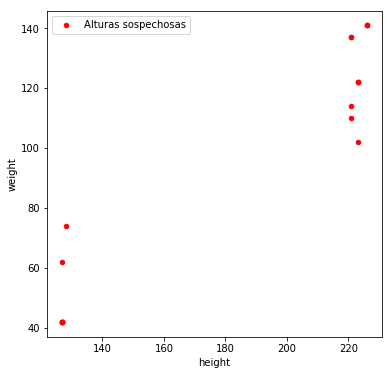

In [9]:
ax = data[(data.height < 130) | (data.height > 220)].plot.scatter(x= 'height' , y='weight', color='Red', label='Alturas sospechosas',figsize=(6,6));

**Conclusión**: Como podemos observar la cantidad de datos en rangos que consideramos como sospechosos es muy baja para la variable Altura. El rango que decidimos usar es menores a 130 cm y mayores a 220cm. Decidimos contrastar la altura con el peso, ya que estas dos variables guardan una estrecha relación. Aún así, podemos concluir que las alturas y pesos cuentan con datos válidos. No encontramos valores que podamos considerar como outliers al contrastar estas dos variables.

- **Edad y altura**

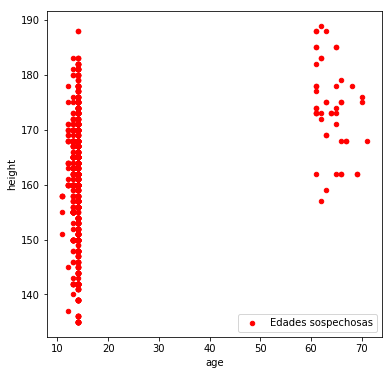

In [10]:
ax = data[(data.age < 15) | (data.age > 60)].plot.scatter(x= 'age' , y='height', color='Red', label='Edades sospechosas',figsize=(6,6));

**Conclusión**: Como podemos observar la variable edad no cuenta con edades en rangos sospechosos, los más raros van entre 10 años y 20 años, y entre 50 años y 70 años. Aún así son valores completamente válidos. Contrastando la variable edad, con la altura podemos ver que para las personas entre 10 y 20 años las alturas se distribuyen en valores entre 130 cm. y 190 cm., que siguen siendo valores válidos aunque más raros que los rangos de alturas para las personas entre 60 y 70 años, que cuentan con alturas entre 150 cm. y 190 cm. aproximadamente.
Podemos concluir que tampoco encontramos outliers en ésta variable.

### Pre-procesado escalar

- Vamos a utilizar la técnica de **pre-procesdo escalar "Min/Max normalization"** para convertir los valores de las variables peso, altura y edad a valores dentro del rango (0, 1).

In [11]:
#Pre-procesado escalar
data.age = data.age.astype(float)
data.height = data.height.astype(float)
data.weight = data.weight.astype(float)
data.year = data.year.astype(float)

from sklearn.preprocessing import minmax_scale

data[['age','height', 'weight', 'year']] = minmax_scale(data[['age','height', 'weight', 'year']])

### Pre-procesado One-Hot Encoder

- **Variable Sex:** Utilizamos la técnica one-hot encoder y creamos dos clumnas denominadas "sex_m" y "sex_f" indicando con True en el sexo correspondiente y con False aquel que no corresponda.

In [12]:
data['sex_m'] = data.sex == 'M'
data['sex_f'] = data.sex == 'F'
data.drop("sex",axis = 1,inplace = True)

- **Season:** Utilizamos la misma técnica anterior, generando dos columnas denominadas "season_summer" y "season_winter" con sus valores booleanos correspondientes (es decir, colocando un True en la variable que corresponda y un False en la que no).

In [13]:
data['season_summer'] = data.season == 'Summer'
data['season_winter'] = data.season == 'Winter'
data.drop("season",axis = 1,inplace = True)

- Para las variables **noc**, **city**, **sport** y **event**, vamos a utilizar la misma técnica (one-hot encoder), generando de ésta manera una columna para cada opción posible, colocando True en la columna correspondiente. 

In [14]:
# one-hot encoder para noc
for noc in data.noc.unique():
    data[noc.lower().replace(" ", "_")] = data.noc == noc 
data.drop("noc",axis = 1,inplace = True)

# one-hot encoder para city
for city in data.city.unique():
    data[city.lower().replace(" ", "_")] = data.city == city 
data.drop("city",axis = 1,inplace = True)

# one-hot encoder para sport
for sport in data.sport.unique():
    data[sport.lower().replace(" ", "_")] = data.sport == sport 
data.drop("sport",axis = 1,inplace = True)

# one-hot encoder para event
for event in data.event.unique():
    data[event.lower().replace(" ", "_")] = data.event == event 
data.drop("event",axis = 1,inplace = True)

## Variables no utilizadas:

- **id y name:** decidimos descartarlos, ya que entendemos que estos datos no son determinantes a la hora de predecir si un atleta es medallista o no. Éstas variables generarían mucha dispersión entre los datos, imposibilitando agruparlos para identificar patrones en los mismos. Además, queremos evitar que el modelo sobreentrene(overfit), memorizando determinados atletas. 

- **game:** descartamos esta variable, al detectar que la misma surge de la concatenación de las variables Year y Season, y por lo tanto no agrega nuevos datos para la predicción. Además, generaría mayor trabajo de preprocesamiento si quisiéramos utilizarla.

- **team:** no vamos a utilizarlos debido a que a través de un análisis detectamos datos que no existen en la realidad, además nos complejizaría el modelo para la predicción, generando demasiada dispersión. Investigando sobre el tema, encontramos que el NOC de los atletas (comité olímpico nacional al que pertenecen) incluye en un porcentaje de aproximadamente el 83% a los datos contemplados en team, basandonos en ésto y debido además a lo anterior mencionado decidimos utilizar la variable NOC en lugar de Team. A continuación se muestra el análisis realizado para determinar el % de coincidencias entre NOC y Team:

In [23]:
#Demostración de por qué se elimina la columna 'Team'

#Leemos los datasets (athelete_events.csv se lee nuevamente ya que deseamos utilizar las variables sin limpieza y pre-procesado)
df = pd.read_csv("data/athlete_events.csv")
noc_regions = pd.read_csv("data/noc_regions.csv")

#Volvemos a eliminar los nulos de athelete_events.csv
df = df.drop(df[df.Age.isnull()].index)
df = df.drop(df[df.Height.isnull()].index)
df = df.drop(df[df.Weight.isnull()].index)

#Preparamos el dataset (noc_regions)
COLUMN_NAMES = {
    'NOC': 'noc',
    'region': 'region',
    'notes': 'notes'
}

noc_regions.rename(columns=COLUMN_NAMES, inplace=True)
noc_regions.drop("notes",axis = 1,inplace = True)

#Añadimos la columna 'region' a cada elemento del dataset
for elemento in noc_regions.to_numpy():
    noc = elemento[0]
    region = elemento[1]
    df.at[df.NOC == noc, 'region'] = region

#Agregamos la leyenda 'Not available' en todos aquellos samples en los que no tengan un NOC valido para añadir la región
df.at[df.region.isnull(), 'region'] = 'Not available'

#Contabilizamos la cantidad de filas en los que el dato de 'region' y por ende de NOC se encuentra incluido en el dato de 'Team'
cant_repeticiones = 0
for index, row in df.iterrows():
    if row.region in row.Team:
        cant_repeticiones = cant_repeticiones + 1

#cant_repeticiones = 220461
#cant_total = 271116

cant_total = df.shape[0]

#Diferencias entre el total y las veces que el dato de NOC está incluido en team
diferencia = cant_total - cant_repeticiones

print('La cantidad total de samples es: '+ str(cant_total) + '. La cantidad de datos de NOC que no están incluidos en team son: ' + str(diferencia) + ". Y los que sí son: " + str(cant_repeticiones))
porcentaje = (cant_repeticiones * 100) / cant_total
print('El porcentaje de casos en los que NOC contiene los datos de team es: '+ str(porcentaje) +'% aproximadamente.')

La cantidad total de samples es: 206165. La cantidad de datos de NOC que no están incluidos en team son: 35181. Y los que sí son: 170984
El porcentaje de casos en los que NOC contiene los datos de team es: 82.93551281740353% aproximadamente.


Eliminación de las variables no utilizadas: 

In [24]:
data.drop("id",axis = 1,inplace = True)
data.drop("name",axis = 1,inplace = True)
data.drop("team",axis = 1,inplace = True)
data.drop("games",axis = 1,inplace = True)


## Análisis variable de salida

### Balanceo:

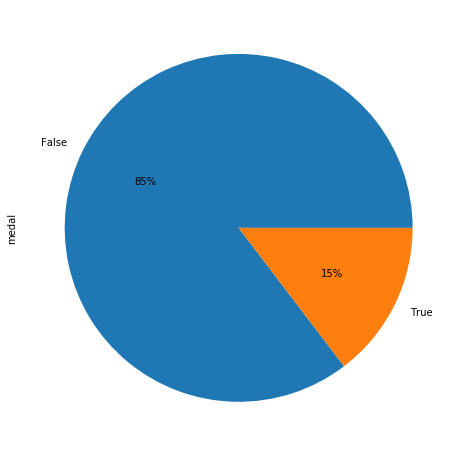

In [25]:
data.medal.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

- **Análisis balanceo:** como se puede observar a partir de la gráfica anterior, notamos que los datos de la variable de salida se encuentran levemente desbalanceados. Sin embargo, a nuestro criterio ésto no hace que descartemos el dataset ni tampoco consideramos que sea completamente malo ya que entendemos que refleja la realidad de nuestro caso de estudio. Por otro lado, al conocer éste desbalanceo, podemos decidir a qué métricas no darles tanta importancia, como es el caso de Accuracy, ya que ésta métrica tiene problemas con desbalances en los datos. 


## Análisis variables de entrada:

Las variables de entradas analizadas son:
- Sex
- Age
- NOC
- Sport
- Year

In [26]:
#Leemos nuevamente el dataset para utilizar los datos sin limpieza y pre-procesado. A excepción de la variable de salida
data3 = pd.read_csv("data/athlete_events.csv")
data3['have_medal'] = data3.Medal.notnull()
data3.drop("Medal",axis = 1,inplace = True)

#Volvemos a limpiar los datos nulos para que las gráficas queden consistentes con la opcíon elegida en la etapa de limpieza y pre-procesado
data3 = data3.drop(data3[data3.Age.isnull()].index)
data3 = data3.drop(data3[data3.Height.isnull()].index)
data3 = data3.drop(data3[data3.Weight.isnull()].index)

## Variable Sex:

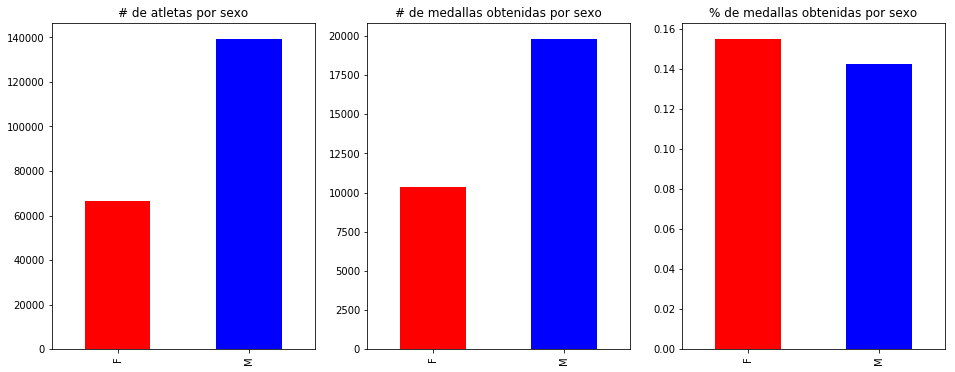

In [27]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de atletas por sexo')
data3.Sex.value_counts().sort_index().plot.bar(ax=ax[0], color=["#FF0000","#0000FF"])
ax[1].set_title('# de medallas obtenidas por sexo')
data3[data3.have_medal == 1].Sex.value_counts().sort_index().plot.bar(ax=ax[1], color=["#FF0000","#0000FF"])
ax[2].set_title('% de medallas obtenidas por sexo')
(data3[data3.have_medal == 1].Sex.value_counts().sort_index() / data3.Sex.value_counts().sort_index()).plot.bar(ax=ax[2], color=["#FF0000","#0000FF"])

- **Conclusión Sex**: al analizar el sexo en el dataset, podemos darnos cuenta rápidamente que la cantidad de participantes hombres es muy superior a la de mujeres. Sin embargo al contrastar esta data contra el porcentaje de medallistas por sexo, obtenemos que el porcentaje de ganadores mujeres y de hombres es muy similar. Incluso es  superior el porcentaje de mujeres.

## Variable Age:

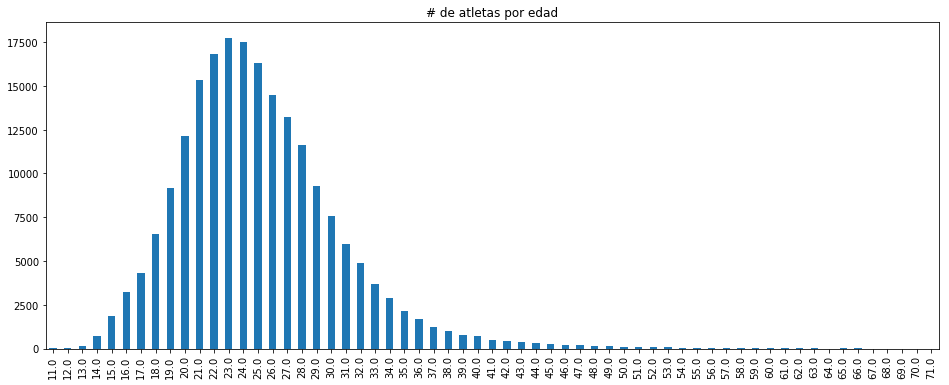

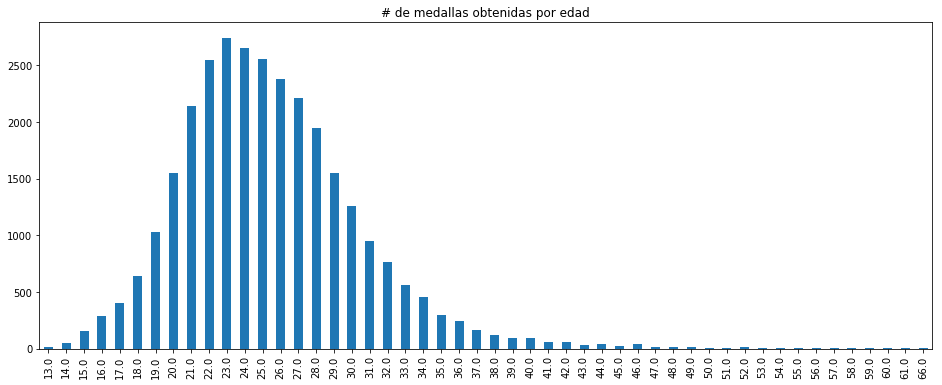

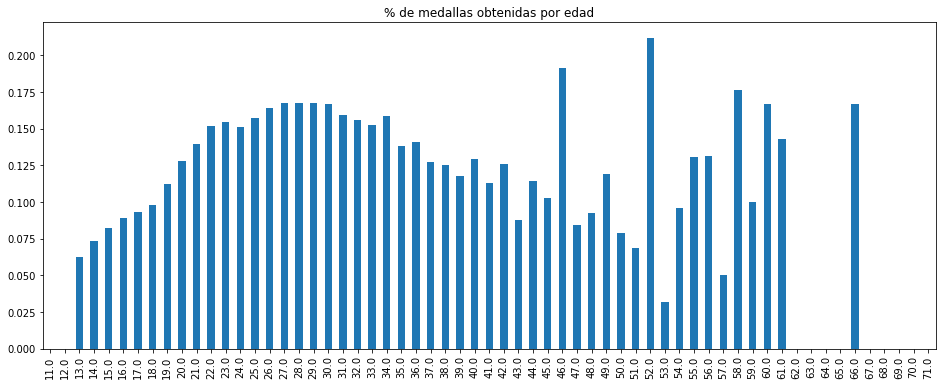

In [28]:
f,ax=plt.subplots(1,1,figsize=(16,6))
ax.set_title('# de atletas por edad')
data3.Age.value_counts().sort_index().plot.bar(ax=ax)

f,ax2=plt.subplots(1,1,figsize=(16,6))
ax2.set_title('# de medallas obtenidas por edad')
data3[data3.have_medal == 1].Age.value_counts().sort_index().plot.bar(ax=ax2)

f,ax3=plt.subplots(1,1,figsize=(16,6))
ax3.set_title('% de medallas obtenidas por edad')
(data3[data3.have_medal == 1].Age.value_counts().sort_index() / data3.Age.value_counts().sort_index()).plot.bar(ax=ax3)

- **Conclusión Age**: al analizar la edad en el dataset, pudimos notar que, como cabría de esperar, la mayor cantidad de atletas inscriptos se encuentran entre los 20 y 30 años. A su vez, podemos observar que la cantidad de medallas obtenidas por edad, está muy relacionado a la cantidad de atletas de esa edad. Sin embargo, el porcentaje de atletas de cada una de las edades que obtuvieron medallas (si bien sigue respetando una distribución similar a la vista en los 2 gráficos previos), en éste caso tiende a equilibrarse más el porcentaje de medallas entre cada una de las edades. Dando como resultado que no haya tanta diferencia de porcentaje entre atletas de 20 años y de 42, por ejemplo. Además se observan algunos casos raros como el porcentaje en atletas que obtienen medallas a los 66 años. La explicación de ésto es que hay mucha menor cantidad de atletas de ésta edad inscriptos presentes en nuestro dataset (6 para ser exactos), de los cuales 1 fue medallista.

## Variable NOC:

Text(0, 0.5, 'Nacionalidades')

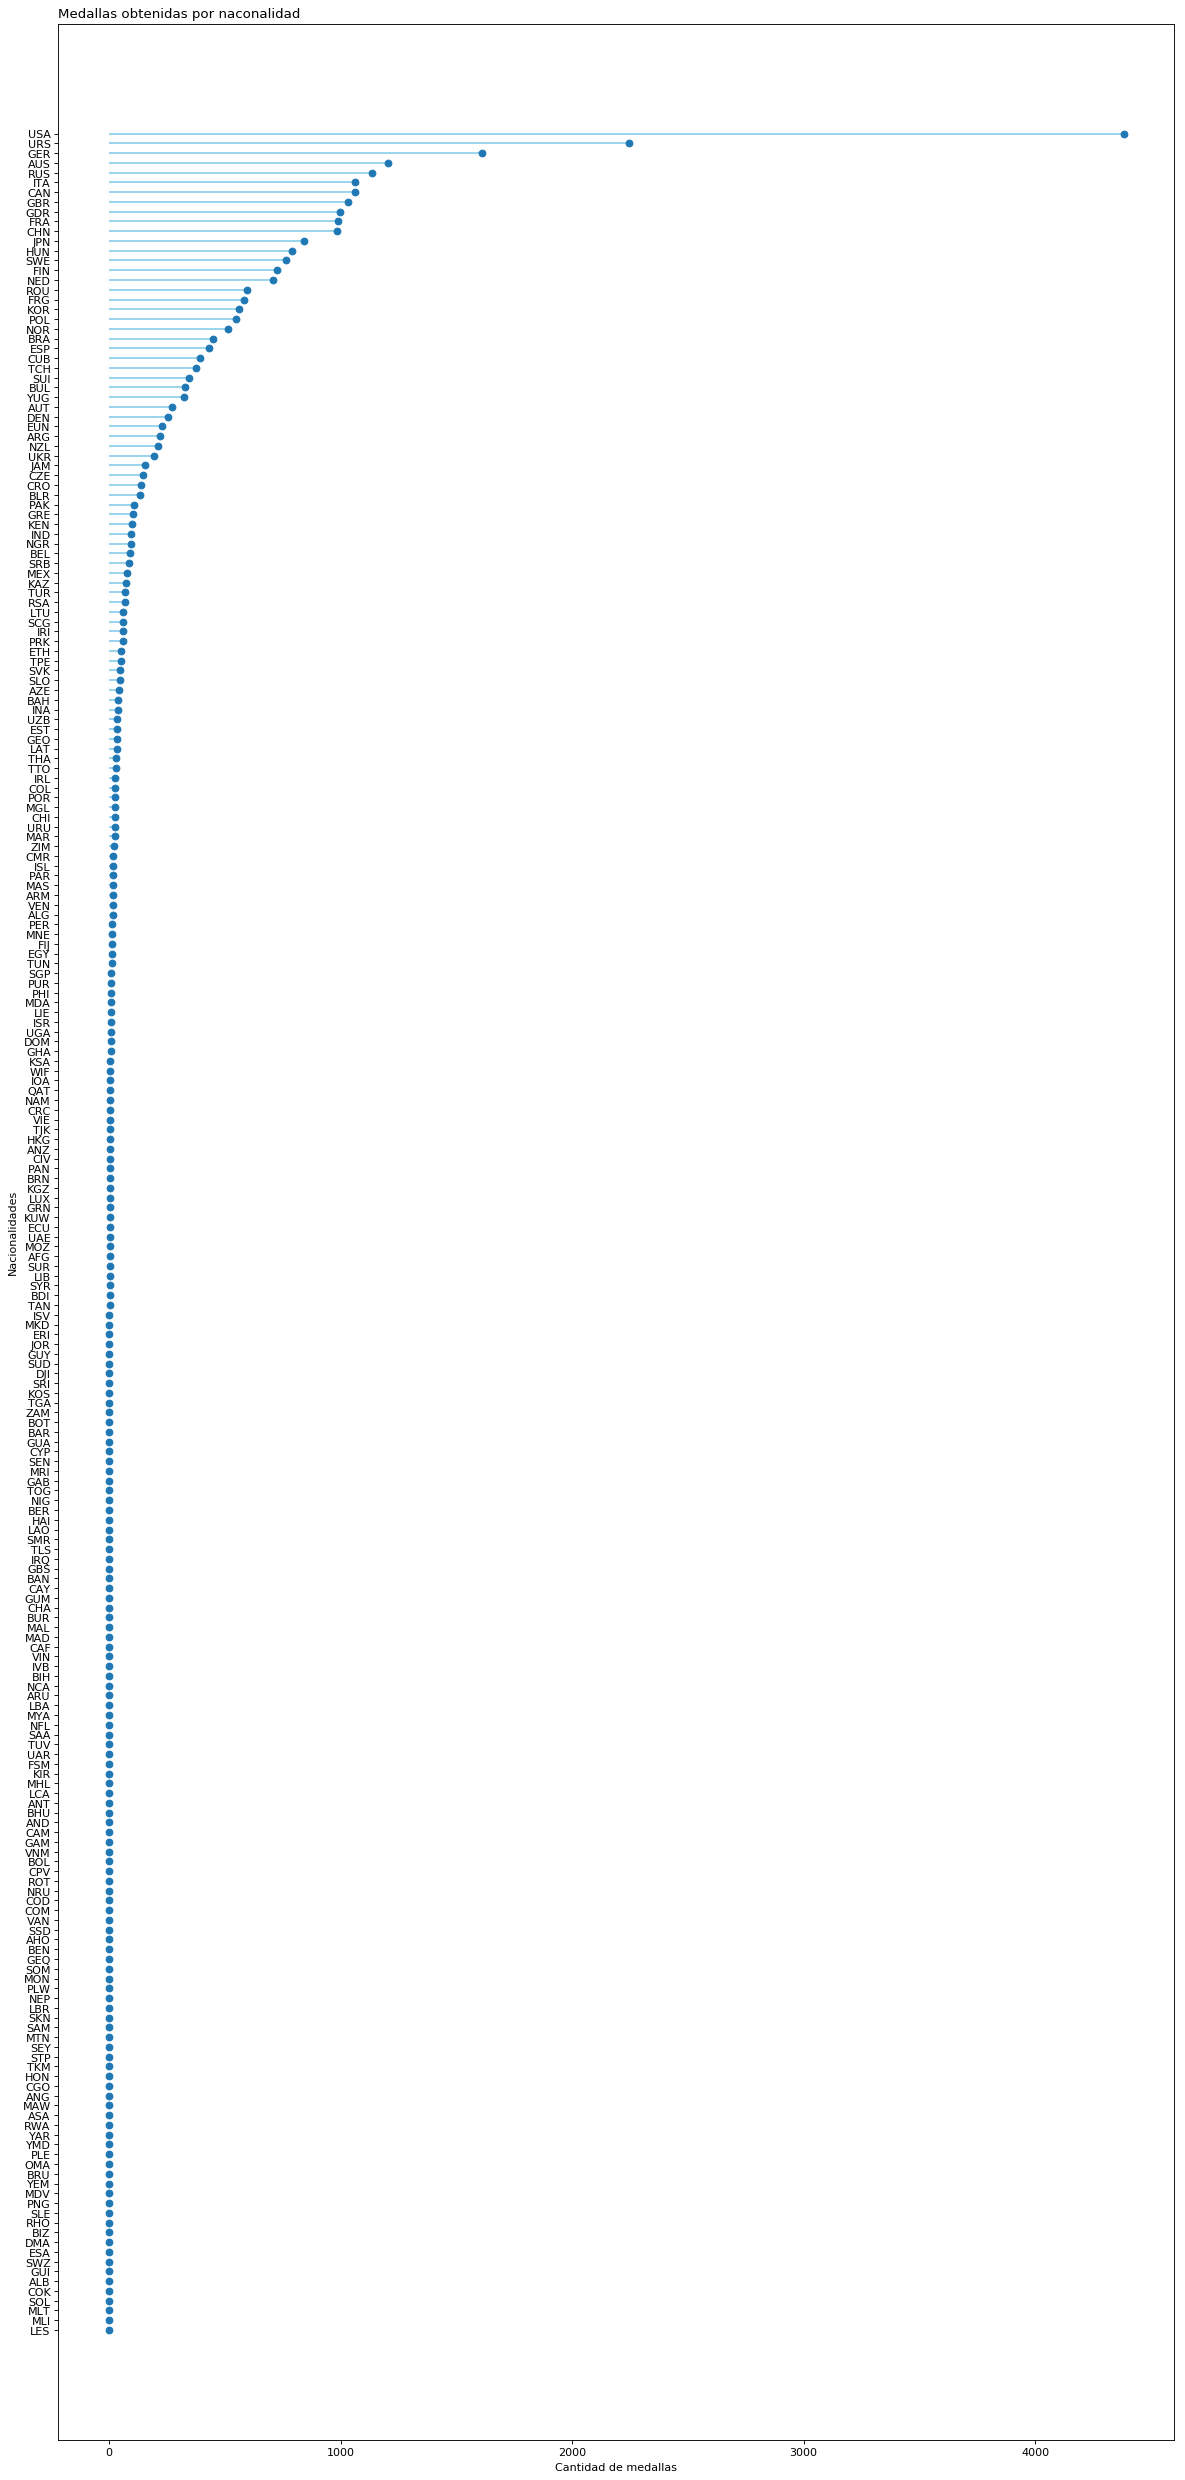

In [29]:
nacionalidades = {}
for nac in data3.NOC.unique():
     nacionalidades[nac] = len(data3[((data3.have_medal == True) & (data3.NOC == nac))])
        
dataNuevo = pd.DataFrame.from_dict(nacionalidades, orient='index',columns=['Cantidad'])

ordered_df = dataNuevo.sort_values(by='Cantidad')
my_range=range(1,len(dataNuevo.index)+1)

from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 40), dpi=80, facecolor='w', edgecolor='k')

plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Cantidad'], color='skyblue')
plt.plot(ordered_df['Cantidad'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Medallas obtenidas por naconalidad", loc='left')
plt.xlabel('Cantidad de medallas')
plt.ylabel('Nacionalidades')

- **Conclusión NOC**: al analizar el NOC en el dataset, podemos darnos cuenta de que la gran mayoría de medallistas pertenecen a unas pocas nacionalidades. Mientras que el resto de comités olímpicos nacionales no cuentan con medallas (o cuentan con muy pocas). Al tratarse de tantos datos, hicimos un análisis numérico para acompañar al gráfico  y tratar comprender aún mejor la situación. 

Resultados del análisis numérico:

- Cantidad de NOCs: 226
- Cantidad de NOCs con más de 4000 medallas: 1
- Cantidad de NOCs con más de  de 2000 medallas: 0
- Cantidad de NOCs con más de  de 1000 medallas: 2
- Cantidad de NOCs con más de  de 500 medallas: 11
- Cantidad de NOCs con más de  de 250 medallas: 10
- Cantidad de NOCs con más de  de 250 medallas: 202

A su vez, a través del gráfico pudimos darnos cuenta que de esos 202 NOCs que cuentan con menos de 250 medallas, no podeen ninguna.
El análisis de esta variable hizo que nos demos cuenta de la importancia que tiene la misma en nuestro dataset.

En la siguiente celda se observa el código utilizado para obtener los resultados numéricos presentados

In [30]:
mas_4000 = 0
mas_2000 = 0
mas_1000 = 0
mas_500 = 0
mas_250 = 0
menos_250 = 0
cantidad_total = 0
for noc in data3.NOC.unique():
    cantidad = data3[(data3.have_medal == 1) & (data3.NOC == noc)].shape[0]
    if cantidad > 4000:
        mas_4000 += 1
    elif cantidad > 2500:
        mas_2000 += 1
    elif cantidad > 1250:
        mas_1000 += 1
    elif cantidad > 750:
        mas_500 += 1
    elif cantidad > 375:
        mas_250 += 1
    else:
        menos_250 += 1
    cantidad_total += 1
    
cant_con = mas_4000 + mas_2000 + mas_1000 + mas_500 + mas_250 + menos_250
cant_sin = cantidad_total - cant_con
print('Cantidad de NOCs: ' + str(cantidad_total))
print('Más de 4000 medallas: ' + str(mas_4000))
print('Más de 2000 medallas: ' + str(mas_2000))
print('Más de 1000 medallas: ' + str(mas_1000))
print('Más de 500 medallas: ' + str(mas_500))
print('Más de 250 medallas: ' + str(mas_250))
print('Menos de 250 medallas: ' + str(menos_250))

Cantidad de NOCs: 226
Más de 4000 medallas: 1
Más de 2000 medallas: 0
Más de 1000 medallas: 2
Más de 500 medallas: 11
Más de 250 medallas: 10
Menos de 250 medallas: 202


## Variable Sport:

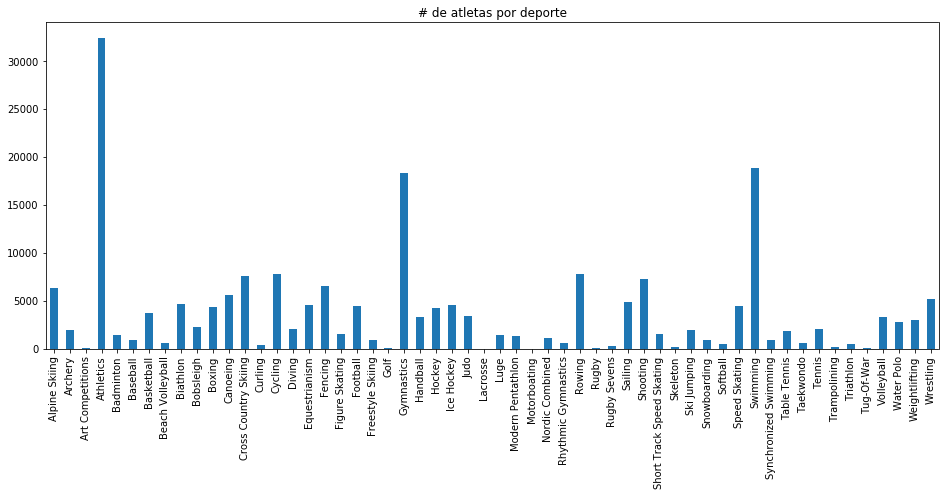

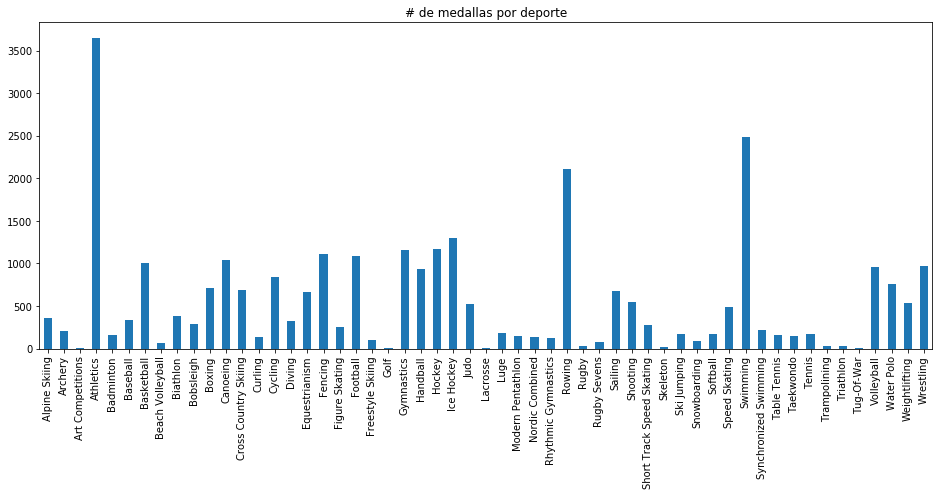

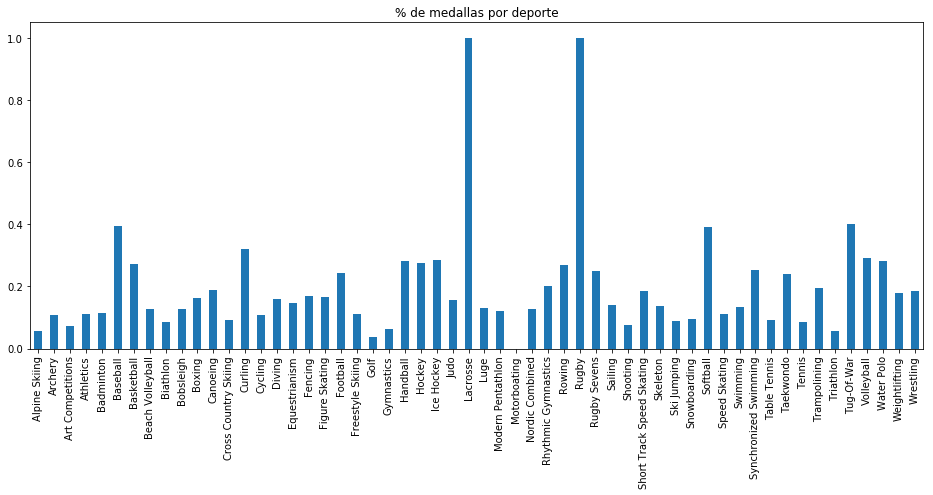

In [31]:
f,ax=plt.subplots(1,1,figsize=(16,6))
ax.set_title('# de atletas por deporte')
data3.Sport.value_counts().sort_index().plot.bar(ax=ax)

f,ax2=plt.subplots(1,1,figsize=(16,6))
ax2.set_title('# de medallas por deporte')
data3[data3.have_medal == True].Sport.value_counts().sort_index().plot.bar(ax=ax2)

f,ax3=plt.subplots(1,1,figsize=(16,6))
ax3.set_title('% de medallas por deporte')
(data3[data3.have_medal == True].Sport.value_counts().sort_index() / data3.Sport.value_counts().sort_index()).plot.bar(ax=ax3)

- **Conclusión Sport**: al analizar la variable deporte en el dataset y contrastarla contra la variable de salida notamos que la cantidad de medallas por deporte guarda una estrecha relación con la cantidad de atletas por deporte. Sin embargo, encontramos algunos casos especiales en donde existen muy pocos deportistas en nuestro dataset para ciertos deportes pero con una gran cantidad de medallas(en proporción a la cantidad de atletas), como es el caso del Rugby. Realizando una investigación sobre el historial de éste deporte en los JJOO pudimos contrastar ésto con los resultados obtenidos y encontramos que efectivamente el rugby estuvo en muy pocas ediciones de los juegos olímpicos, lo que explica la baja cantidad de atletas pertenecientes a éste deporte en nuestro dataset. Además la interpretación de ésta variable, hace que tegamos más precaución cuando se trate de estos deportes especiales.

## Variable Year:

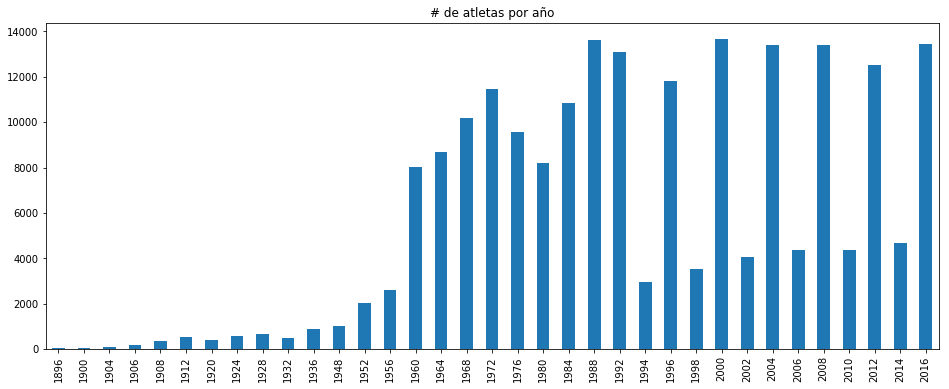

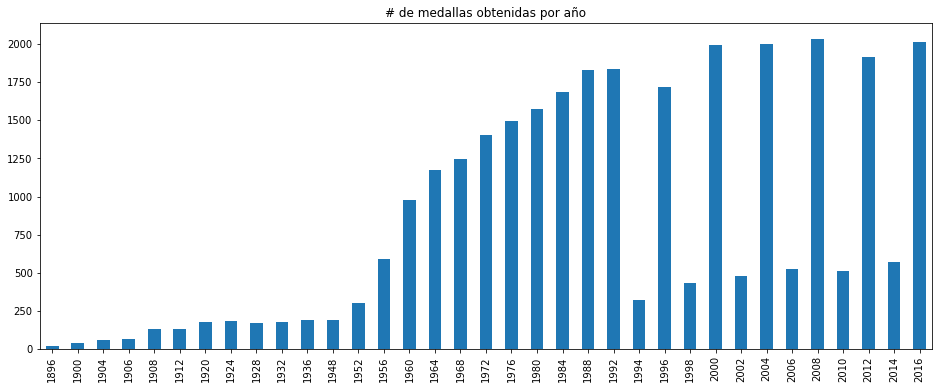

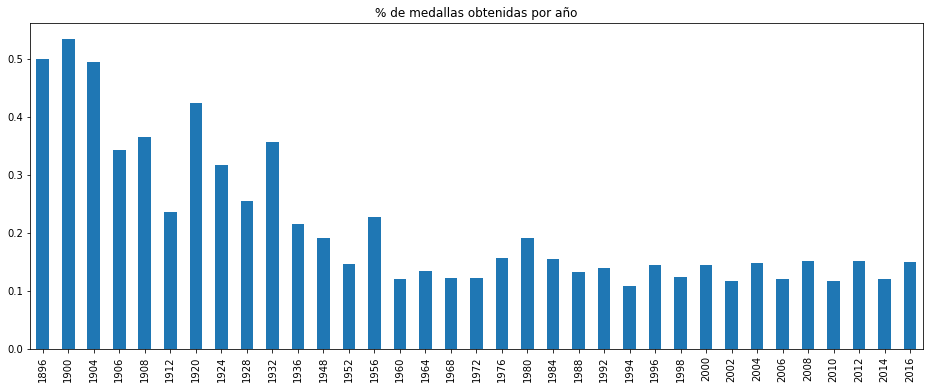

In [32]:
f,ax=plt.subplots(1,1,figsize=(16,6))
ax.set_title('# de atletas por año')
data3.Year.value_counts().sort_index().plot.bar(ax=ax)

f,ax2=plt.subplots(1,1,figsize=(16,6))
ax2.set_title('# de medallas obtenidas por año')
data3[data3.have_medal == True].Year.value_counts().sort_index().plot.bar(ax=ax2)

f,ax3=plt.subplots(1,1,figsize=(16,6))
ax3.set_title('% de medallas obtenidas por año')
(data3[data3.have_medal == True].Year.value_counts().sort_index() / data3.Year.value_counts().sort_index()).plot.bar(ax=ax3)

- **Conclusión Year**: al analizar la variable year en el dataset, pudimos notar que la cantidad de atletas inscriptos por año fue en aumento desde 1986 hasta su pico 1992 (teniendo algunos descensos en el medio). A partir de allí el número bajó entre cada edición. Sin embargo realizando una inevstigación, obtuvimos que ésto ocurre debido a que a partir de ese año los JJOO se separaron por temporada (invierno y verano) y comemzaron a realizarse con dos años de diferencia entre ellos, ésto explica la reducción en la cantidad de inscriptos en cada edición a partir de éste año: la cantidad de participantes se divide entre las temporadas. Pudimos darnos cuenta además que si bien el número de atletas inscriptos fue en crecimiento, ésto no ocurre con el porcentaje de medallas obtenidas por año, teniendo su pico máximo en las primeras ediciones, para luego descender y equilibrarse en las posteriores.
